In [5]:
import savReaderWriter as sav


ModuleNotFoundError: No module named 'savReaderWriter'

In [4]:
import os
import pickle
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
from datetime import datetime
%matplotlib inline

import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.core.display import display, HTML
import seaborn as sns
import pandas as pd
import numpy as np

# Legend
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import unidecode
plt.rcParams.update({'font.size': 16})

C:\Users\judit\AppData\Local\Temp\ipykernel_2332\2174783688.py:12: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [6]:
# Importing data
with open( r'../_data/data_endes.pickle', 'rb') as f:
    df = pickle.load(f )

In [7]:
df

,Unnamed: 0,CASEID,V000,V001,V002,V003,V004,V008,V009,V010,...,V508,V509,V510,V511,V512,V513,V525,V613,V714,V715
0,0,000102701 1,PE6,1.0,27.0,1.0,1.0,1386.0,7.0,1985.0,...,2001.0,1220.0,Month and year,16.0,13.0,10-14,15.0,4.0,Yes,3.0
1,1,000104301 1,PE6,1.0,43.0,1.0,1.0,1386.0,4.0,1974.0,...,2007.0,1290.0,Month and year,33.0,8.0,5-9,26.0,2.0,No,9.0
2,2,000104801 2,PE6,1.0,48.0,2.0,1.0,1386.0,1.0,1980.0,...,1998.0,1177.0,Month and year,18.0,17.0,15-19,18.0,1.0,Yes,11.0
3,3,000104801 3,PE6,1.0,48.0,3.0,1.0,1386.0,11.0,1999.0,...,NaN,NaN,NaN,NaN,NaN,Never married,Not had intercourse,0.0,Yes,NaN
4,4,000105001 3,PE6,1.0,50.0,3.0,1.0,1386.0,8.0,1993.0,...,NaN,NaN,NaN,NaN,NaN,Never married,21.0,2.0,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182863,182863,325406201 2,PE6,3254.0,62.0,2.0,3254.0,1440.0,12.0,1971.0,...,1985.0,1032.0,Tiene mes y año,14.0,34.0,De 30 a más años,12.0,3.0,No,5.0
182864,182864,325406301 2,PE6,3254.0,63.0,2.0,3254.0,1440.0,6.0,1988.0,...,2002.0,1236.0,Tiene mes y año,14.0,17.0,De 15 a 19 años,12.0,3.0,No,7.0
182865,182865,325407001 2,PE6,3254.0,70.0,2.0,3254.0,1440.0,7.0,1973.0,...,1986.0,1043.0,Tiene mes y año,13.0,33.0,De 30 a más años,12.0,4.0,No,5.0
182866,182866,325407201 2,PE6,3254.0,72.0,2.0,3254.0,1440.0,12.0,1994.0,...,2008.0,1301.0,Tiene mes y año,13.0,11.0,De 10 a 14 años,13.0,2.0,No,11.0


Check Unique ID

In [8]:
(df.CASEID + df.year.astype( str )).is_unique  #Ver que el ID es único a pesar de los años 

True

From CMC to datetime. Info about datetime use [this link](https://docs.python.org/3/library/datetime.html#datetime.datetime.strptime)

In [9]:
from datetime import datetime        

datetime.strptime( f'09-02-2019', '%m-%d-%Y')

datetime.datetime(2019, 9, 2, 0, 0)

See [this article](https://demographicestimation.iussp.org/content/dhs-century-month-codes) to convert CMC to datetime

In [10]:
def cmc_date( cmc ):
    year = 1900 + int( ( cmc - 1 ) / 12 )
    month = int( cmc - 12*( year - 1900 ) )
    datetime_object = datetime.strptime( f'{month}/{year}', '%m/%Y')
    
    return datetime_object

In [11]:
df[ 'inerview_date' ] = df.V008.apply( lambda x: cmc_date( x ) )

In [12]:
df[ 'inerview_month' ] = df[ 'inerview_date' ].dt.strftime( "%b" )
df[ 'inerview_month1' ] = df[ 'inerview_date' ].dt.month
df[ 'inerview_year' ] = df[ 'inerview_date' ].dt.year
df.sort_values( 'inerview_month1', inplace = True )

C:\Users\judit\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


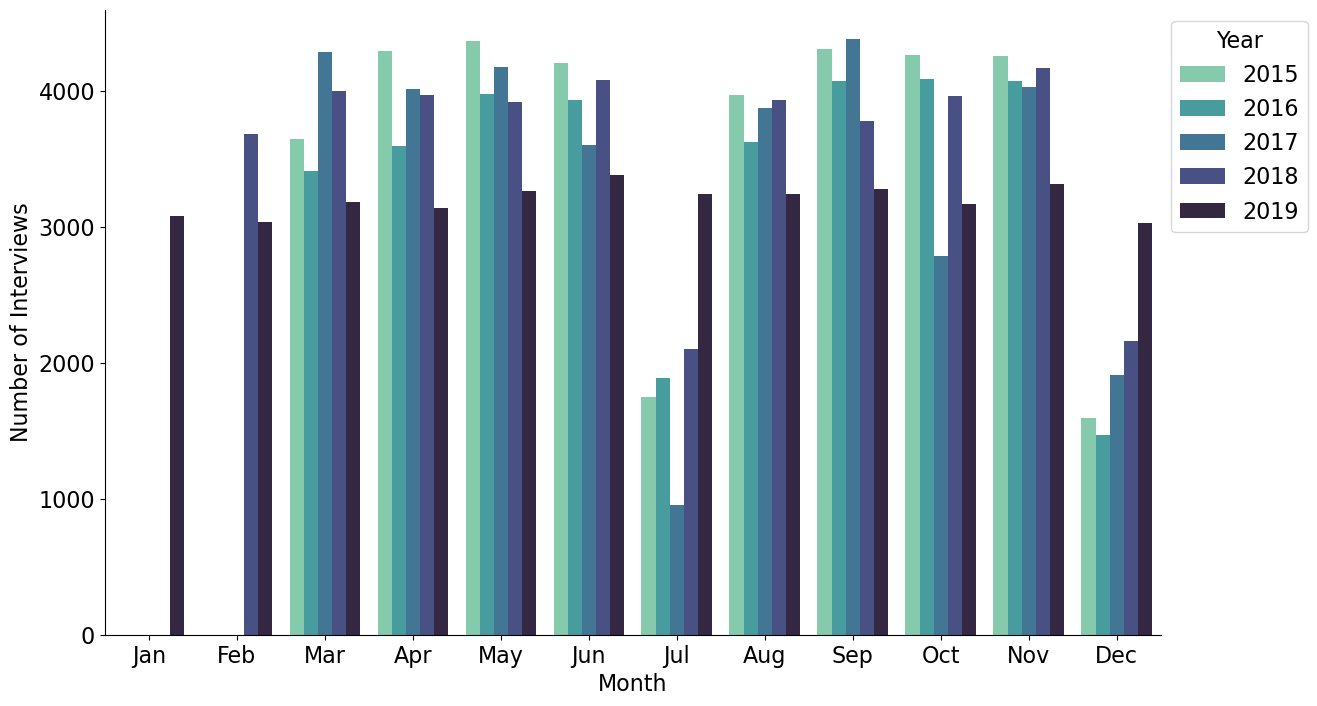

In [13]:
# Settin

fig1 = sns.catplot( data = df, x = 'inerview_month', kind = 'count', #catplot: contar 
            hue = 'inerview_year', 
            palette = sns.color_palette("mako_r", 5 ), 
            legend = False )


fig1.fig.set_size_inches( 15, 8 )

plt.ylabel( "Number of Interviews" )
plt.xlabel( "Month" )
plt.legend( title = 'Year', bbox_to_anchor = (1.15, 1 ), loc = 0 )

In [15]:
fig1.axes_dict

{2015: <Axes: title={'center': 'Interview Year - 2015'}, ylabel='Number of Interviews'>,
 2016: <Axes: title={'center': 'Interview Year - 2016'}>,
 2017: <Axes: title={'center': 'Interview Year - 2017'}, ylabel='Number of Interviews'>,
 2018: <Axes: title={'center': 'Interview Year - 2018'}, xlabel='Month'>,
 2019: <Axes: title={'center': 'Interview Year - 2019'}, xlabel='Month', ylabel='Number of Interviews'>}

In [ ]:
#Ver la cantidad de encuestados por año, en espeífcio para cada mes 

C:\Users\judit\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


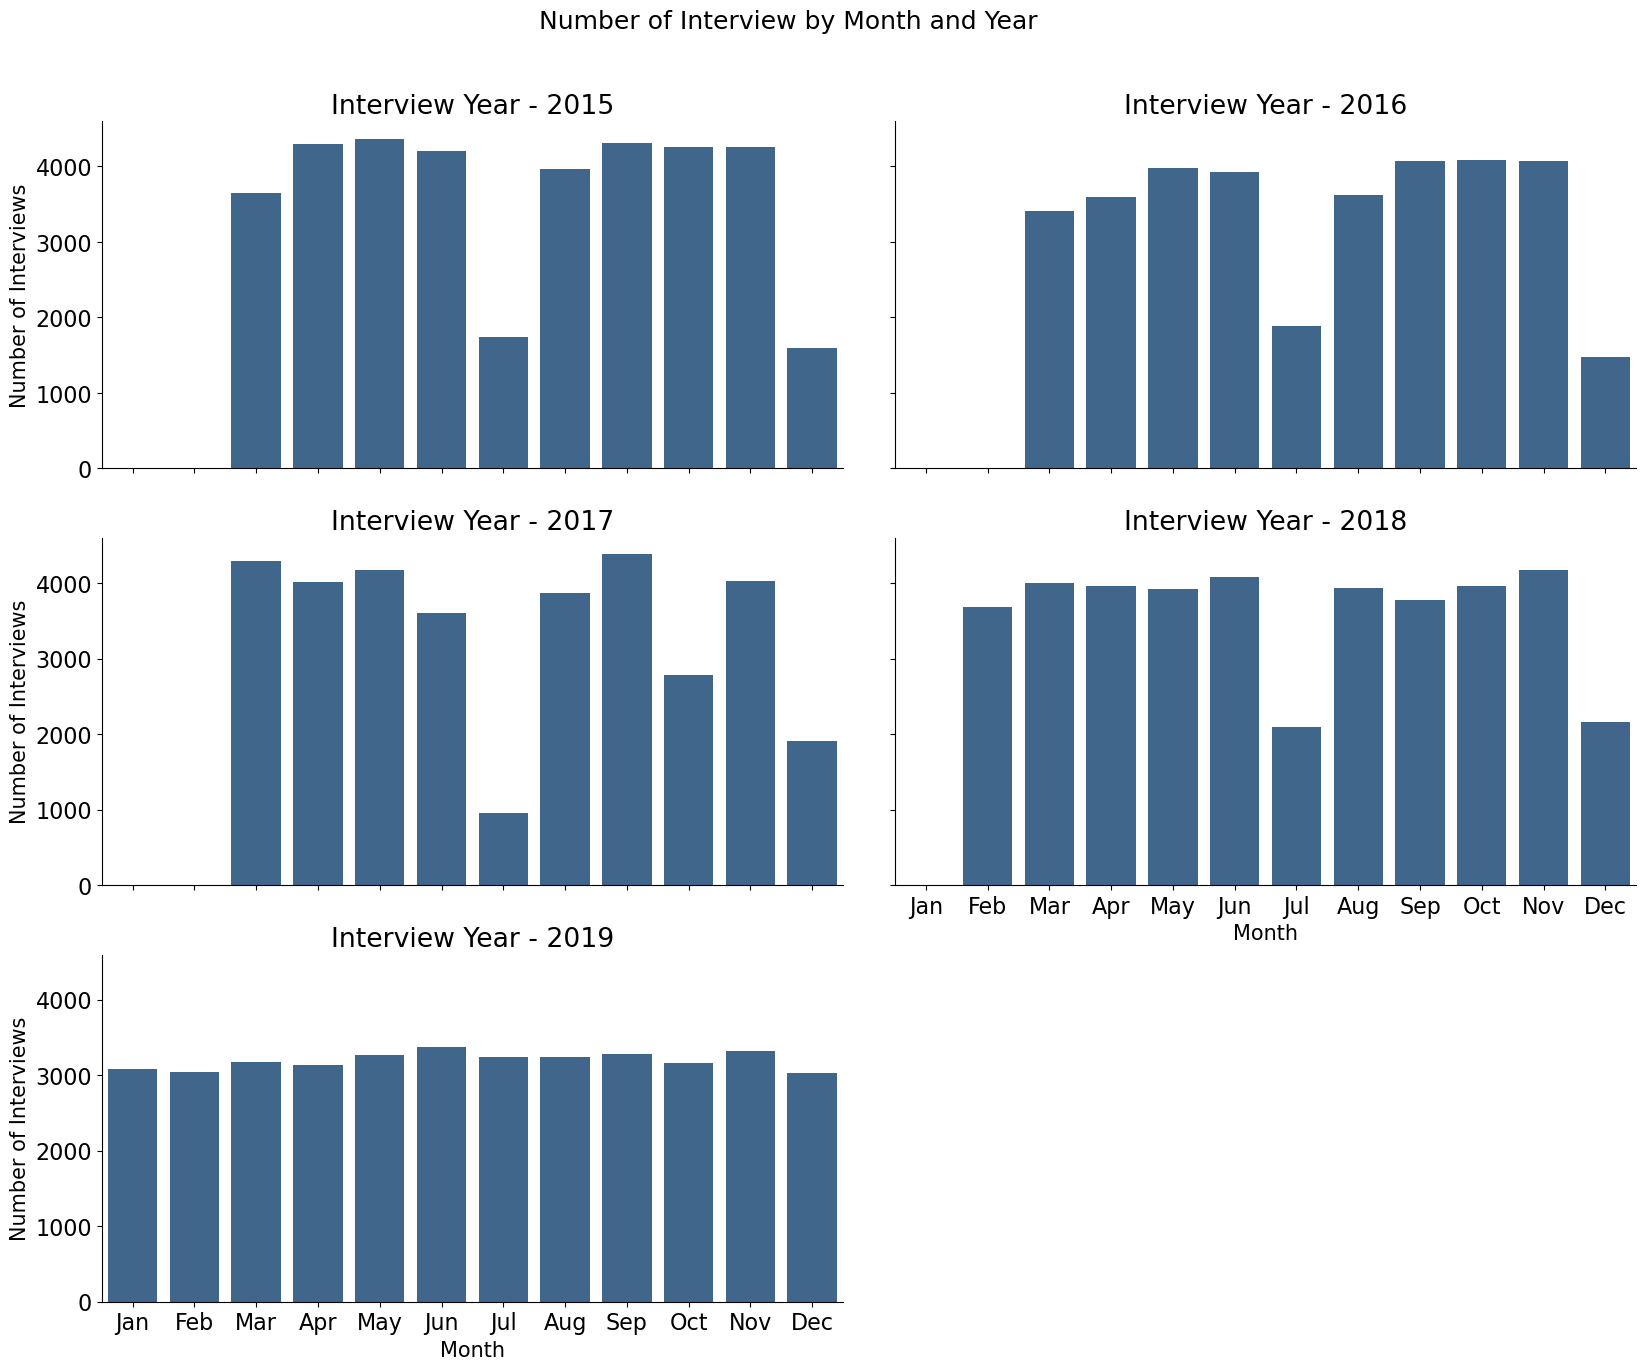

In [14]:
# Settin
fig1 = sns.catplot( data = df, x = 'inerview_month', kind = 'count',
            col = 'inerview_year', col_wrap = 2,
            legend = False,  color = (0.2, 0.4, 0.6, 0.6) ) #legend false: yo colocaré la leyenda 

# Fix figure size
fig1.fig.set_size_inches( 18, 14 )

# Fix title 
# add space between plots and title
fig1.fig.subplots_adjust(top=0.9)
fig1.fig.suptitle( "Number of Interview by Month and Year", 
                size = 18  )

# Add vertical space between plots
plt.subplots_adjust( hspace = 0.2 )

# Set axis labels
fig1.set_axis_labels( "Month", "Number of Interviews", size = 15 )

# Change title for each subplot
for year in fig1.axes_dict.keys():
    fig1.axes_dict[ year ].set_title( f'Interview Year - { year }' )
    


Distribution of Age

In [ ]:
fig2 = sns.displot( data = df, x = 'V012', hue = 'year', 
            palette = sns.color_palette("mako_r", 5 ), 
           kind = "kde" )


# Make title
fig2.fig.subplots_adjust(top=0.9)
fig2.fig.suptitle( "Distribution of Interviewed Age by Surveys Year", 
                size = 14 )

# Change legend title
fig2._legend.set_title( "Year" )

# Set axis labels
fig2.set_axis_labels( "Age", "Density", size = 15 );


Distribution Total children ever born by place of residence

In [ ]:
df.V102.unique()

In [ ]:
df[ 'urban' ] = df.V102.copy()
df[ 'urban' ].replace( 'Urbana', 'Urbano', inplace = True )
df[ 'urban' ].replace( 'Urban', 'Urbano', inplace = True )

In [ ]:
df.attrs['var_labels']

In [ ]:
# Plot ploints
fig = plt.figure( figsize = ( 10, 9 ) )
sns.stripplot( y = "V201", hue = "year", 
                x = "urban", 
                data = df, jitter = True,
                palette = sns.color_palette("rocket", 5 )[::-1], 
                dodge = True, 
                linewidth = 1, edgecolor = 'white' )

# Plot boxplot
yx = sns.boxplot( y = "V201", hue = "year", 
                x = "urban", 
                data = df, 
                palette = sns.color_palette("rocket", 5 )[::-1], 
                fliersize = 0 )

# Number of labels
yr = df.year.unique().size

# Get legend labels and handles
handles, labels = yx.get_legend_handles_labels()

# When creating the legend, only use the first 5 elements
# to effectively remove the last.
plt.legend(handles[0:yr], labels[0:yr], bbox_to_anchor=(1.05, 1), 
           loc=2, borderaxespad=0., title = "Year" )

# x label
plt.xlabel( "Type of place of residence" )
plt.ylabel( "Total children ever born" );

### Total children by cohort

In [ ]:
sns.histplot( data = df, x = 'V010')
plt.xlabel( "Respondent's year of birth" )

In [ ]:
sns.boxplot( data = df, y = 'V010')
plt.ylabel( "Respondent's year of birth" )

In [ ]:
def gen_cohot( series, size = 5 ):
    
    min1 = int( ( ( series.min() ) / size) ) * size
    max1 = int( np.ceil( ( series.max() ) / size) ) * size
    result = np.arange( min1, max1 + 1 , 5 )
    labels = np.ceil( ( result[ 1: ] + result[ :-1 ] ) / 2 ).astype( int )
    
    return result, labels

In [ ]:
gen_cohot( df.V010, size = 10 )

In [ ]:
cohorts, labels = gen_cohot( df.V010 )

In [ ]:
df[ 'birth_cohort' ] = pd.cut( df.V010, bins  = cohorts, 
                              include_lowest = True, labels = labels )

In [ ]:
df

In [ ]:
# Plot ploints
fig = plt.figure( figsize = ( 10, 9 ) )

sns.pointplot( x = "birth_cohort", y = "V201", 
               data = df, ci = 'sd')

# x label
plt.xlabel( "Cohort" )
plt.ylabel( "Total children ever born" )

In [ ]:
# Plot ploints
fig = plt.figure( figsize = ( 10, 9 ) )

sns.pointplot( x = "birth_cohort", y = "V201", 
               data = df, ci = 'sd', hue = 'urban', 
             dodge = 0.2, 
              linestyles = [ "-", "--" ] )

# x label
plt.xlabel( "Cohort" )
plt.ylabel( "Total children ever born" )

# Change legend title
plt.legend( title =  "Type of place\n of residence" )

## First sex relationship

In [ ]:
df.V525.unique()

In [ ]:
df[ 'first_sex' ] = df.V525.copy()

In [ ]:
df.first_sex.replace( 'Not had intercourse', np.nan, inplace = True )
df.first_sex.replace( 'No ha tenido relación sexual', np.nan, inplace = True )
df.first_sex.replace( 'Nunca tuvo relaciones sexuales', np.nan, inplace = True )
df.first_sex.replace( 'En la primera unión', 'At first union', inplace = True )
df.first_sex.replace( 'En la primera union', 'At first union', inplace = True )

In [ ]:
# Filter values in variables

filter1 = df.first_sex == 'At first union'
df.loc[ filter1 , 'first_sex' ] = df.loc[ filter1 , 'V511' ]

In [ ]:
df.first_sex = df.first_sex.astype( float )

In [ ]:
df.first_sex

Celaning region variable

In [ ]:
sns.displot( data = df, x = 'first_sex', 
            kind = 'kde', col = 'V024', 
            col_wrap = 3, 
            facet_kws = {'sharex' : False, 
                        'sharey' : False }, 
            hue = 'urban'
           )

In [ ]:
df[ 'dpto' ] = df.V024.copy()

In [ ]:
df.dpto = df.dpto.str.lstrip() \
            .str.replace( " ", "_" ) \
            .str.lower() \
            .apply( lambda x :  unidecode.unidecode( x ) )

In [ ]:
sns.displot( data = df, x = 'first_sex', 
            kind = 'kde', col = 'dpto', 
            col_wrap = 3, 
            facet_kws = {'sharex' : False, 
                        'sharey' : False }, 
            hue = 'urban'
           )

## Total children ever born by cohort and wife and husband education

In [ ]:
df[ 'h_educ_yr' ] = df.V715.copy()

df.h_educ_yr.replace( 'No sabe', np.nan, inplace = True )
df.h_educ_yr.replace( "Don't know", np.nan, inplace = True )

In [ ]:
df.loc[ ( df.V133 <= 12 ), 'w_educ' ] = 'Low'
df.loc[ ( df.V133 > 12), 'w_educ' ] = 'High'

df.loc[ ( df.h_educ_yr <= 12 ), 'h_educ_str' ] = 'Low'
df.loc[ ( df.h_educ_yr > 12), 'h_educ_str' ] = 'High'

In [ ]:
# Plot ploints
fig = plt.figure( figsize = ( 10, 9 ) )

sns.pointplot( x = "birth_cohort", y = "V201", 
               data = df, ci = 'sd', hue = 'w_educ', 
             dodge = 0.2, 
              linestyles = [ "-", "--" ] )

# x label
plt.xlabel( "Cohort" )
plt.ylabel( "Total children ever born" )

# Change legend title
plt.legend( title =  "Wife Education" )

In [ ]:
# Plot ploints
fig = plt.figure( figsize = ( 10, 9 ) )

sns.pointplot( x = "birth_cohort", y = "V201", 
               data = df, ci = 'sd', hue = 'h_educ_str', 
             dodge = 0.2, 
              linestyles = [ "-", "--" ] )

# x label
plt.xlabel( "Cohort" )
plt.ylabel( "Total children ever born" )

# Change legend title
plt.legend( title =  "Husband Education" )